### Predict Graduate Admissions

#### Probelm Statement :Use classification technique for  prediction of Graduate Admissions from an Indian perspective.
##### The dataset contains the following attributes:
##### Serial No.	
##### GRE Score	
##### TOEFL Score	
##### University Rating	
##### SOP	
##### LOR	
##### CGPA	
##### Research	
##### Chance of AdmitVariable

### Importing necessary libraries

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [34]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\Admission_Predict.csv")

### Data Exploration 

In [35]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [36]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


##### Chance of Admit is the target variable to be predicted and takes value between 0 and 1. 
##### Except Serial No. , the first seven columns are predictor variables.


In [37]:
#finding shape of the dataset(number of rows and columns)
df.shape

(400, 9)

In [38]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [39]:
#statistical info
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [40]:
#checking for number of null values in each column
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [41]:
#Finding for duplicate values
df.duplicated().sum()

0

In [42]:
df1=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research', 'Chance of Admit ']]

### Exploratory Data Analysis

In [43]:
#predictor variables or features
x=df1.drop('Chance of Admit ',axis=1)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [44]:
#target variable
y=df1['Chance of Admit ']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

#### Let's plot a heatmap to see the correlation of all the features compared to Chance to Admit

<Axes: >

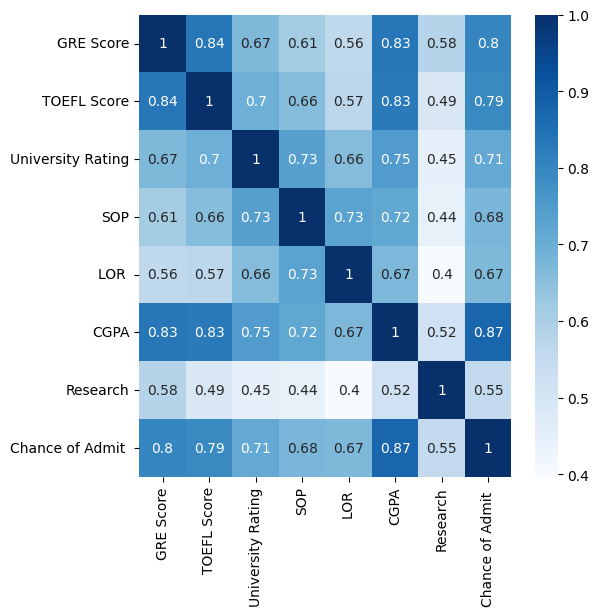

In [45]:
plt.figure(figsize=(6,6))
sns.heatmap(df1.corr(), annot=True, cmap='Blues')

##### The top three features that affect the Chance to Admit are:

##### CGPA
##### TOEFL Score
##### GRE Score

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

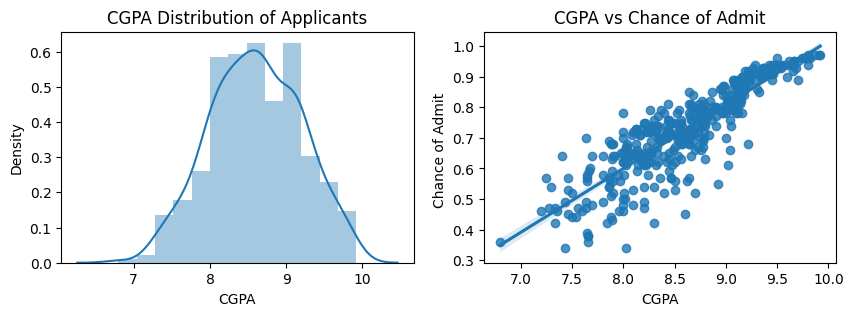

In [46]:
#CGPA
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(x='CGPA', y='Chance of Admit ',data=df1)
plt.title('CGPA vs Chance of Admit')

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

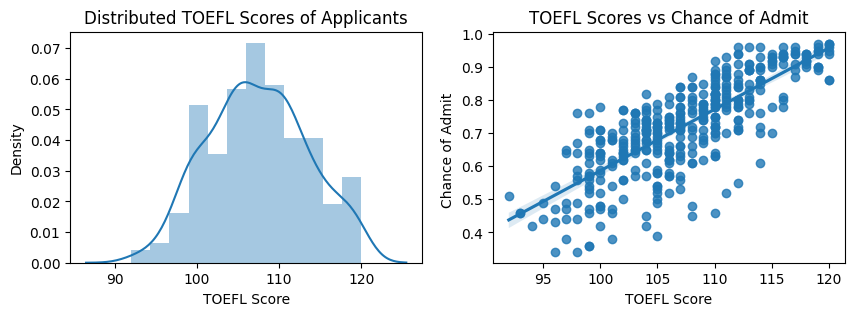

In [47]:
#TOEFL 
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.distplot(df1['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(x='TOEFL Score', y='Chance of Admit ',data=df1)
plt.title('TOEFL Scores vs Chance of Admit')

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

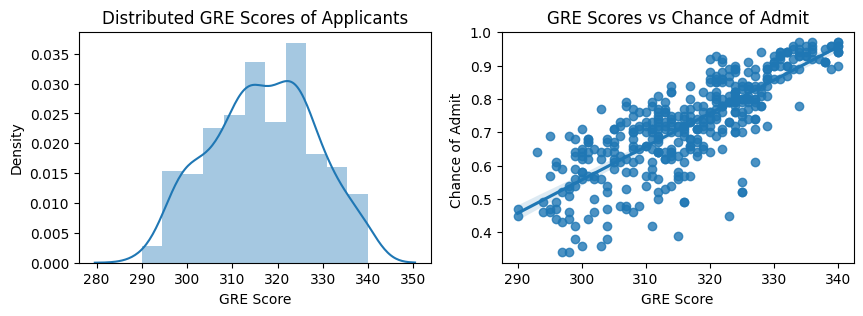

In [48]:
#GRE
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(x='GRE Score',y='Chance of Admit ',data=df1)
plt.title('GRE Scores vs Chance of Admit')

### Preparing data for using classification techniques

#### Splitting the data into training and testing sets

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [50]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0


In [51]:
x_train.shape

(320, 7)

In [52]:
y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 320, dtype: float64

#### Converting to Categorical values i.e., 0 and 1

In [53]:
y_train=[1 if value>0.8 else 0 for value in y_train]
y_test=[1 if value>0.8 else 0 for value in y_test]

y_train=np.array(y_train)
y_test=np.array(y_test)

In [54]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

### Classification Techniques

### Logistic Regression

LR accuracy score:
0.925
The lr confusion matrix is:
[[50  1]
 [ 5 24]]


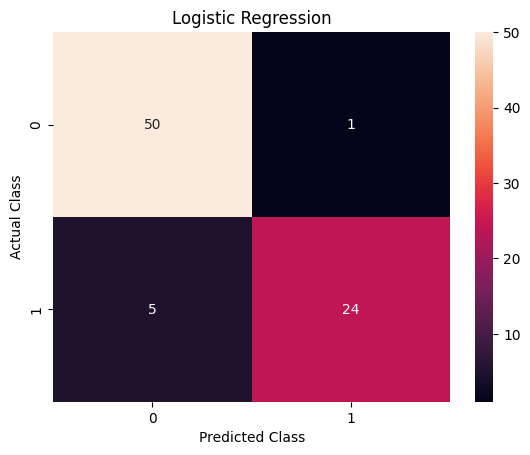

In [55]:
#Train the model
lr=LogisticRegression()
lr.fit(x_train,y_train)

#predictions on test set
y_pred1=lr.predict(x_test)

#Evaluating the model accuracy
print("LR accuracy score:")
print(accuracy_score(y_test,y_pred1))

#Visualizing the confusion matrix
lr_conf_mat = confusion_matrix(y_test,y_pred1)
print('The lr confusion matrix is:')
print(lr_conf_mat)
sns.heatmap(lr_conf_mat, annot=True )
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Logistic Regression')
plt.show()

### RandomForest Classifier

RF accuracy score:
0.925
The rf confusion matrix is:
[[49  2]
 [ 4 25]]


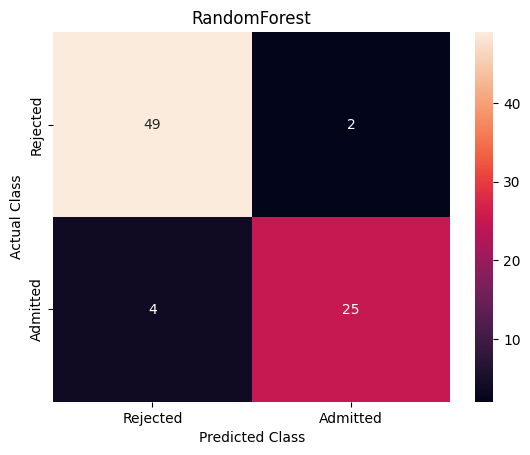

In [56]:
#Train the model
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

#predictions on test set
y_pred2=rf.predict(x_test)

#Evaluating the model accuracy
print("RF accuracy score:")
print(accuracy_score(y_test,y_pred2))

#Visualizing the confusion matrix
rf_conf_mat = confusion_matrix(y_test,y_pred2)
print('The rf confusion matrix is:')
print(rf_conf_mat)
sns.heatmap(rf_conf_mat, annot=True, fmt='d',xticklabels = [ "Rejected","Admitted"] , yticklabels = [ "Rejected","Admitted"] )
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('RandomForest')
plt.show()

### GradientBoosting Classifier

GB accuracy score:
0.975
The gb confusion matrix is:
[[50  1]
 [ 1 28]]


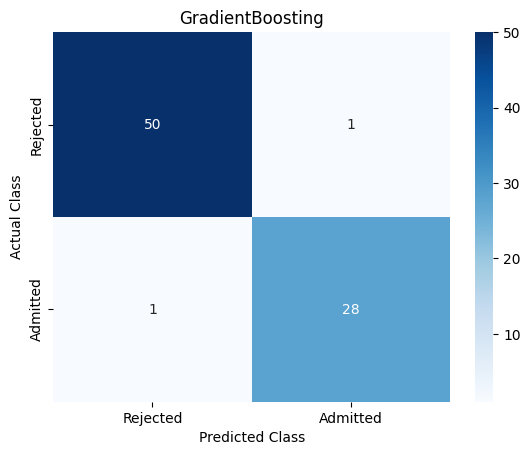

In [57]:
#Train the model
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

#predictions on test set
y_pred3=gb.predict(x_test)

#Evaluating the model accuracy
print("GB accuracy score:")
print(accuracy_score(y_test,y_pred3))

#Visualizing the confusion matrix
gb_conf_mat = confusion_matrix(y_test,y_pred3)
print('The gb confusion matrix is:')
print(gb_conf_mat)
sns.heatmap(gb_conf_mat, annot=True,cmap='Blues',xticklabels = [ "Rejected","Admitted"] , yticklabels = [ "Rejected","Admitted"] )
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('GradientBoosting')
plt.show()


### Comaparision of Classifiers

In [58]:
final_data=pd.DataFrame({'Models':['LR','RF','GB'],'ACCURACY_SCORE':[accuracy_score(y_test,y_pred1),
                                                                           accuracy_score(y_test,y_pred2),
                                                                           accuracy_score(y_test,y_pred3)]})
final_data

,Models,ACCURACY_SCORE
0,LR,0.925
1,RF,0.925
2,GB,0.975


Text(0.5, 1.0, 'Comparision of different Classifiers')

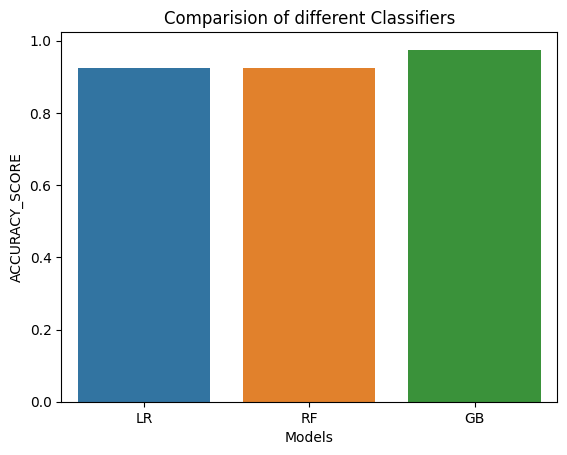

In [59]:
sns.barplot(x='Models',y='ACCURACY_SCORE',data=final_data)
plt.title("Comparision of different Classifiers")